In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load correlation matrix
cor_df = pd.read_csv("BRCA_xCell_Correlation_Matrix.csv", index_col=0)

# Convert to long-form
cor_long = (
    cor_df.stack()
    .reset_index()
    .rename(columns={'level_0': 'Gene', 'level_1': 'Cell_Type', 0: 'Correlation'})
)

# Get top 5 (absolute correlation) per gene
cor_long['AbsCorr'] = cor_long['Correlation'].abs()
top_df = cor_long.sort_values(['Gene', 'AbsCorr'], ascending=[True, False]).groupby('Gene').head(5)

# Save top correlation data
top_df[['Gene', 'Cell_Type', 'Correlation']].to_csv("Top5_Correlated_Cells_per_Gene.csv", index=False)

# Plotting
sns.set(style="whitegrid")
genes = top_df['Gene'].unique()

fig, axes = plt.subplots(nrows=len(genes), ncols=1, figsize=(10, 2.5 * len(genes)), dpi=600)

for i, gene in enumerate(genes):
    ax = axes[i] if len(genes) > 1 else axes
    data = top_df[top_df['Gene'] == gene].sort_values('Correlation')

    # Lollipop plot
    ax.hlines(y=data['Cell_Type'], xmin=0, xmax=data['Correlation'], color='gray')
    ax.plot(data['Correlation'], data['Cell_Type'], "o", color='black')

    ax.set_title(f"{gene}", fontweight='bold', fontname='serif', fontsize=12)
    ax.set_xlabel("Spearman Correlation", fontweight='bold', fontname='serif')
    ax.set_ylabel("")

    # Serif + bold fonts
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('serif')
        label.set_fontweight('bold')

plt.tight_layout()
plt.savefig("Lollipop_Top5_ImmuneGeneCorrelations.png", dpi=600)
plt.show()

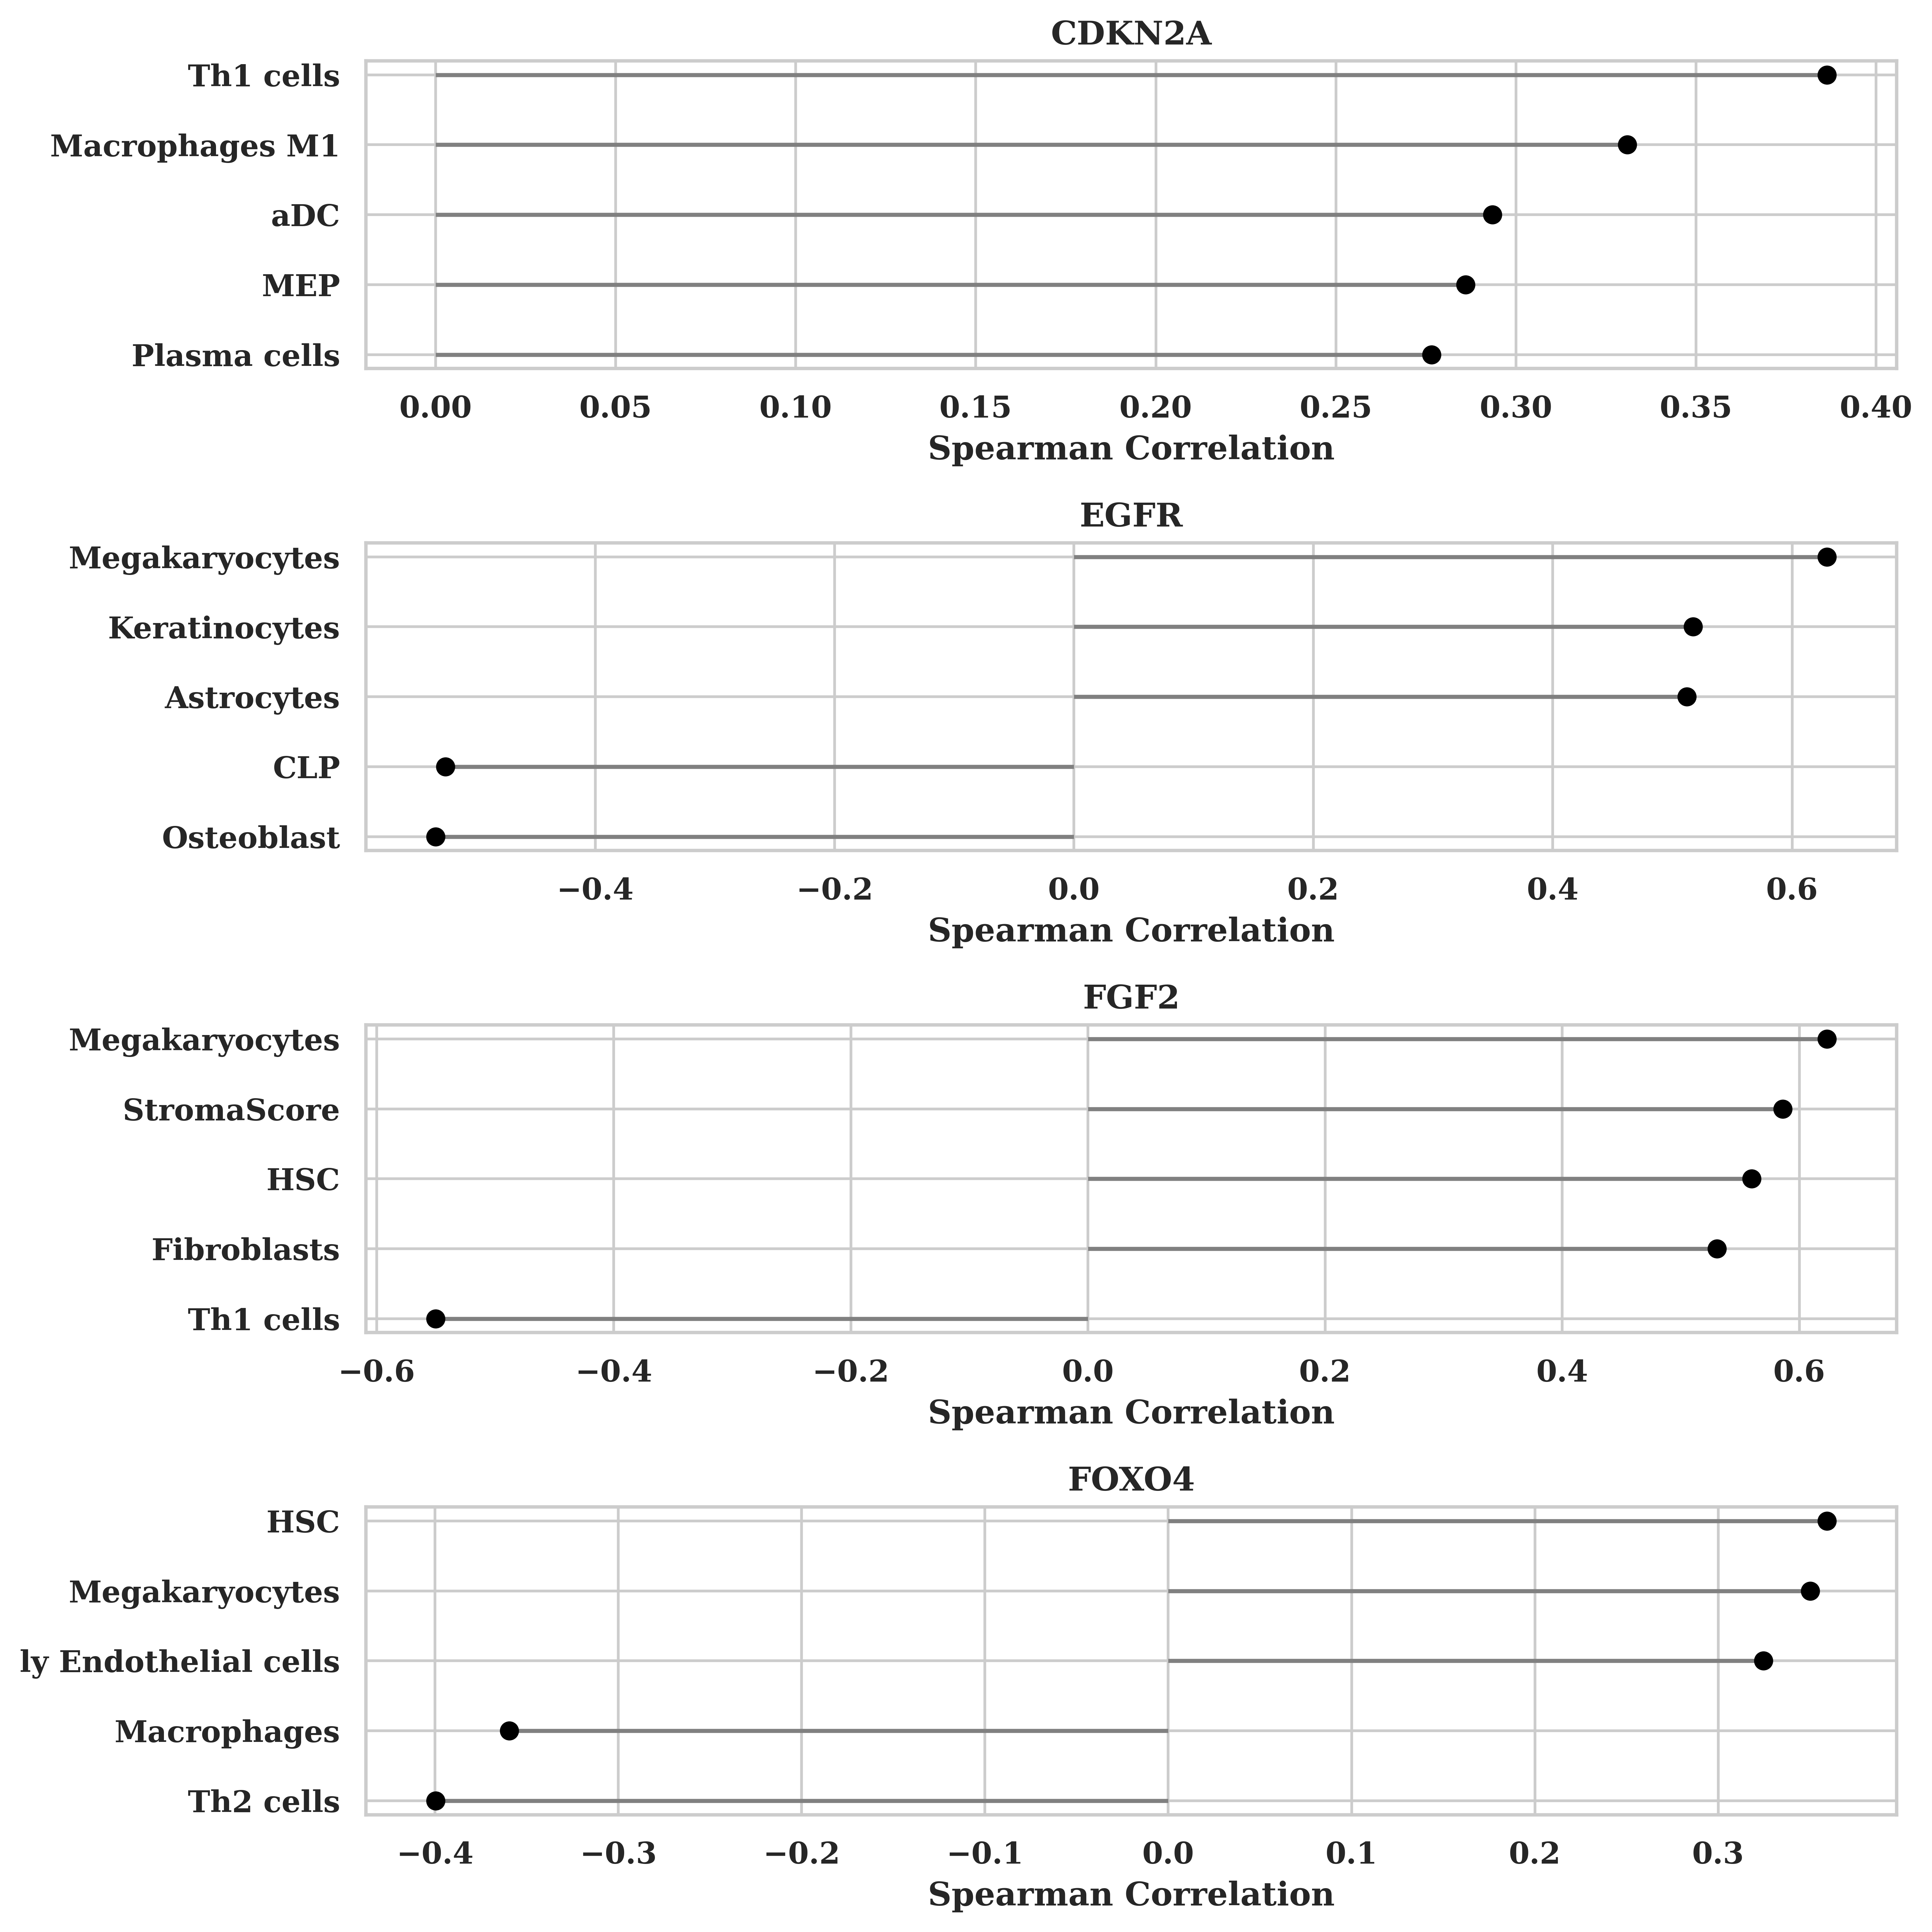

✅ Plot saved to: Immune_Correlation_Plots_4Genes/Lollipop_Top5_ImmuneGeneCorrelations.png


In [1]:
#for four genes
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Setup Output Directory ===
output_dir = "Immune_Correlation_Plots_4Genes"
os.makedirs(output_dir, exist_ok=True)

# === Load the 4-gene xCell correlation matrix ===
cor_df = pd.read_csv("BRCA_4Gene_xCell_Correlation_Matrix.csv", index_col=0)

# === Convert to long-form dataframe ===
cor_long = (
    cor_df.stack()
    .reset_index()
    .rename(columns={'level_0': 'Gene', 'level_1': 'Cell_Type', 0: 'Correlation'})
)

# === Get top 5 (absolute correlation) per gene ===
cor_long['AbsCorr'] = cor_long['Correlation'].abs()
top_df = (
    cor_long
    .sort_values(['Gene', 'AbsCorr'], ascending=[True, False])
    .groupby('Gene')
    .head(5)
)

# === Save the top correlations ===
top_df[['Gene', 'Cell_Type', 'Correlation']].to_csv(
    os.path.join(output_dir, "Top5_Correlated_Cells_per_Gene.csv"),
    index=False
)

# === Plotting ===
sns.set(style="whitegrid")
genes = top_df['Gene'].unique()

fig, axes = plt.subplots(nrows=len(genes), ncols=1, figsize=(10, 2.5 * len(genes)), dpi=600)

for i, gene in enumerate(genes):
    ax = axes[i] if len(genes) > 1 else axes
    data = top_df[top_df['Gene'] == gene].sort_values('Correlation')

    # Lollipop plot
    ax.hlines(y=data['Cell_Type'], xmin=0, xmax=data['Correlation'], color='gray')
    ax.plot(data['Correlation'], data['Cell_Type'], "o", color='black')

    ax.set_title(f"{gene}", fontweight='bold', fontname='serif', fontsize=12)
    ax.set_xlabel("Spearman Correlation", fontweight='bold', fontname='serif')
    ax.set_ylabel("")

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('serif')
        label.set_fontweight('bold')

plt.tight_layout()
output_path = os.path.join(output_dir, "Lollipop_Top5_ImmuneGeneCorrelations.png")
plt.savefig(output_path, dpi=600)
plt.show()

print(f"✅ Plot saved to: {output_path}")

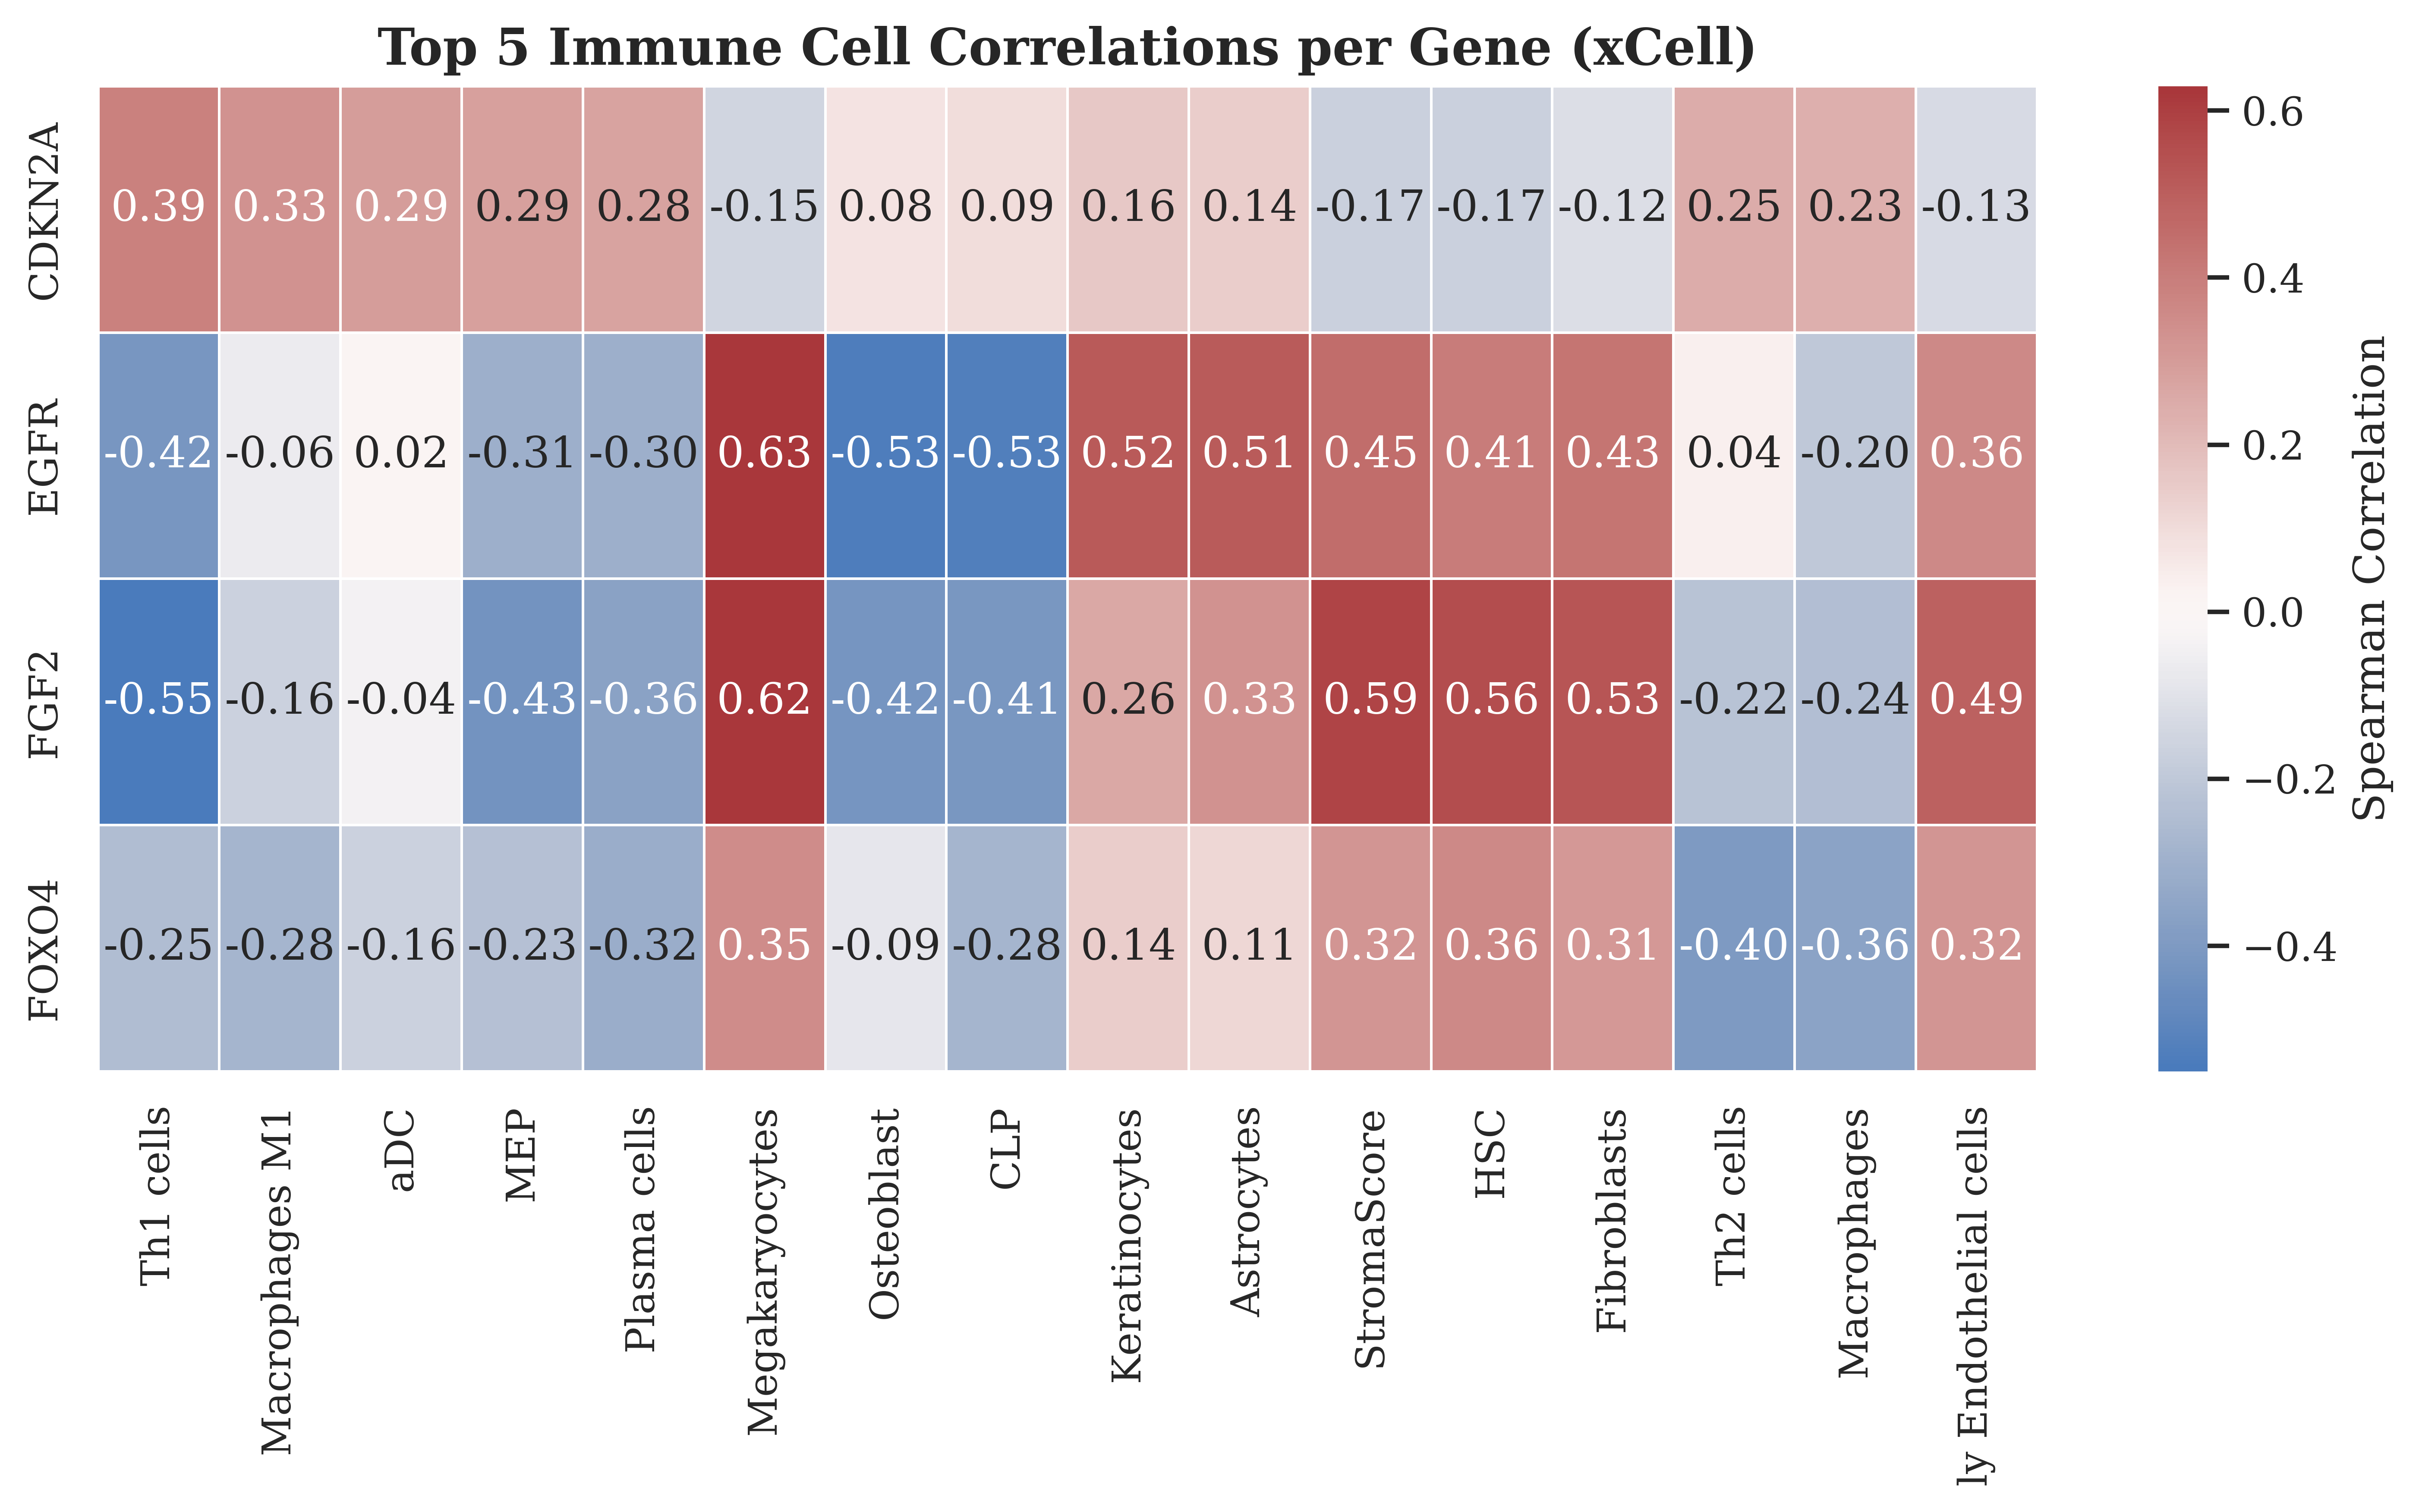

✅ Heatmap saved to: Immune_Correlation_Plots_4Genes/Heatmap_Top5_Immune_Correlations.png


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Set up output directory ===
output_dir = "Immune_Correlation_Plots_4Genes"
os.makedirs(output_dir, exist_ok=True)

# === Load full correlation matrix ===
cor_df = pd.read_csv("BRCA_4Gene_xCell_Correlation_Matrix.csv", index_col=0)

# === Load previously computed top 5 correlations ===
top5_df = pd.read_csv(os.path.join(output_dir, "Top5_Correlated_Cells_per_Gene.csv"))

# === Extract required genes and cell types ===
genes = top5_df['Gene'].unique()
cell_types = top5_df['Cell_Type'].unique()

# === Subset the correlation matrix ===
filtered_df = cor_df.loc[genes, cell_types]

# === Plot heatmap ===
plt.figure(figsize=(10, 6), dpi=600)
sns.set(font="serif", font_scale=1.0)
heatmap = sns.heatmap(
    filtered_df,
    cmap="vlag",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.title("Top 5 Immune Cell Correlations per Gene (xCell)", fontsize=14, weight='bold')
plt.tight_layout()

# === Save the heatmap ===
heatmap_path = os.path.join(output_dir, "Heatmap_Top5_Immune_Correlations.png")
plt.savefig(heatmap_path, dpi=600)
plt.show()

print(f"✅ Heatmap saved to: {heatmap_path}")

In [5]:
from PIL import Image
import os

# Path to the input TIFF file
input_path = "/Users/apple/Desktop/BRCA/5A.BRCA_Ferroptosis_Analysis/BRCA_Ferroptosis_Heatmap.tiff"

# Load the image
with Image.open(input_path) as img:
    # Convert RGBA to RGB (drop alpha channel)
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    
    # Define the output path (.jpg version)
    output_path = os.path.splitext(input_path)[0] + "_600dpi.jpg"
    
    # Save as JPEG with 600 DPI
    img.save(output_path, format='JPEG', dpi=(600, 600), quality=95)

print(f"Image saved as JPEG with 600 DPI at: {output_path}")

Image saved as JPEG with 600 DPI at: /Users/apple/Desktop/BRCA/5A.BRCA_Ferroptosis_Analysis/BRCA_Ferroptosis_Heatmap_600dpi.jpg
